In [1]:
#my imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
pd.options.display.max_seq_items = 2000

## Grabbing and Cleaning Data

In [3]:
#cleaning and adding ghg data
ghg = pd.read_csv('../../data/dirty_data/total-ghg-emissions.csv')
ghg.drop(columns=['Code'], inplace=True)
ghg.rename(columns={"Total GHG emissions including LUCF (CAIT)":"Total GHG"}, inplace=True)
ghg = ghg[ghg['Year']>1989]
ghg = ghg[ghg['Year'] < 2015]
ghg.to_csv('../../data/new_cleaned/ghg.csv')

In [4]:
#cleaning and adding airpollution death share data
airpol_death_share = pd.read_csv('../../data/dirty_data/share-deaths-air-pollution.csv')
airpol_death_share.drop(columns=['Code'], inplace=True)
airpol_death_share.rename(columns={"Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Percent)": "Deaths %"}, inplace=True)
airpol_death_share = airpol_death_share[airpol_death_share['Year']>1989]
airpol_death_share = airpol_death_share[airpol_death_share['Year'] < 2015]
airpol_death_share.to_csv('../../data/new_cleaned/airpol_death_share.csv')

In [5]:
#cleaning and adding airpollution data
airpol = pd.read_csv('../../data/dirty_data/PM25-air-pollution.csv')
airpol.drop(columns=['Code'], inplace=True)
airpol.rename(columns={"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "Air Pollution"}, inplace=True)
airpol = airpol[airpol['Year']>1989]
airpol = airpol[airpol['Year'] < 2015]
airpol.to_csv('../../data/new_cleaned/airpol.csv')

In [6]:
#cleaning and adding net zero binary data
net_zero_binary = pd.read_csv('../../data/dirty_data/net-zero-target-set.csv')
net_zero_binary.drop(columns=['Code'], inplace=True)
net_zero_binary.rename(columns={"Is there a net-zero target?":"Net-Zero Target"}, inplace=True)
net_zero_binary.rename(columns={"Year":"Year-Zs"}, inplace=True)
net_zero_binary['Net-Zero Target'] = net_zero_binary['Net-Zero Target'].map({"Yes":1, "No":0})
#net_zero_binary = net_zero_binary[net_zero_binary['Year']>1989]
net_zero_binary.to_csv('../../data/new_cleaned/net_zero_binary.csv')

In [7]:
#cleaning and adding food co2 emmissions data
food_co2e = pd.read_csv('../../data/dirty_data/emissions-from-food.csv')
food_co2e.drop(columns=['Code'], inplace=True)
food_co2e.rename(columns={"Food emissions by country":"Food Emissions"}, inplace=True)
food_co2e = food_co2e[food_co2e['Year']>1989]
food_co2e = food_co2e[food_co2e['Year'] < 2015]
food_co2e.to_csv('../../data/new_cleaned/food_co2e.csv')

In [8]:
#cleaning and adding ozone data
ozone = pd.read_csv('../../data/dirty_data/consumption-of-ozone-depleting-substances.csv')
ozone.drop(columns=['Code'], inplace=True)
ozone.rename(columns={"Consumption of Ozone-Depleting Substances - All":"Consumption of Ozone"}, inplace=True)
ozone = ozone[ozone['Year']>1989]
ozone = ozone[ozone['Year'] < 2015]
ozone.to_csv('../../data/new_cleaned/ozone.csv')

In [9]:
#cleaning and adding transport data
transport = pd.read_csv('../../data/dirty_data/co2-emissions-transport.csv')
transport.drop(columns=['Code'], inplace=True)
transport.rename(columns={"Transport (CAIT, 2020)":"Transport"}, inplace=True)
transport = transport[transport['Year']>1989]
transport = transport[transport['Year'] < 2015]
transport = transport[transport['Entity'] != 'World']
transport = transport[transport['Entity'] != 'European Union (27)']
transport.to_csv('../../data/new_cleaned/transport.csv')

In [10]:
#cleaning and adding co2 per capital data
co2_percap = pd.read_csv('../../data/dirty_data/co-emissions-per-capita.csv')
co2_percap.drop(columns=['Code'], inplace=True)
co2_percap.rename(columns={"Annual CO2 emissions (per capita)":"CO2 Emissions Per Cap"}, inplace=True)
co2_percap = co2_percap[co2_percap['Year']>1989]
co2_percap = co2_percap[co2_percap['Year'] < 2015]
co2_percap.to_csv('../../data/new_cleaned/co2_percap.csv')

In [11]:
share_co2 = pd.read_csv('../../data/dirty_data/annual-share-of-co2-emissions.csv')
share_co2.drop(columns=['Code'], inplace=True)
share_co2.rename(columns={"Share of global annual CO2 emissions":"Shared CO2 Emissions"}, inplace=True)
share_co2 = share_co2[share_co2['Year']>1989]
share_co2 = share_co2[share_co2['Year'] < 2015]
share_co2.to_csv('../../data/new_cleaned/share_co2.csv')

In [12]:
co2 = pd.read_csv('../../data/dirty_data/annual_country_co2.csv')
co2.drop(columns=['Code'], inplace=True)
co2.rename(columns={"Annual CO2 emissions":"CO2 Emissions"}, inplace=True)
co2 = co2[co2['Year']>1989]
co2 = co2[co2['Year'] < 2015]
co2.to_csv('../../data/new_cleaned/co2.csv')

In [13]:
clean_air = pd.read_csv('../../data/added_data/clean_with_air.csv')

In [14]:
kahuna = pd.read_csv('../kg/kahuna.csv')

In [15]:
list_data = [airpol_death_share, co2, co2_percap, food_co2e, ghg, ozone, share_co2, transport]

------------------------------

## Combining All Data

In [16]:
combos = pd.merge(airpol_death_share, co2, on=['Year', 'Entity'])
combos = pd.merge(combos, co2_percap, on=['Year', 'Entity'])
combos = pd.merge(combos, food_co2e, on=['Year', 'Entity'])
combos = pd.merge(combos, ghg, on=['Year', 'Entity'])
combos = pd.merge(combos, ozone, on=['Year', 'Entity'])
combos = pd.merge(combos, share_co2, on=['Year', 'Entity'])
combos = pd.merge(combos, transport, on=['Year', 'Entity'])
combos = combos.loc[:,~combos.columns.duplicated()]

In [17]:
clean_air

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_rate_household_air_pol,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.00,0.02,500000.0,...,98.112348,46.051505,73.711348,949.199276,2033.148497,172.433312,5.975427,271.661092,512.126572,60.714220
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.40,0.01,600000.0,...,81.760043,37.768185,63.413417,828.043002,1792.207903,127.035936,4.580403,240.740486,469.406670,49.692924
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.20,0.01,600000.0,...,80.923134,38.585679,58.832538,858.066586,1795.573829,113.537473,4.373679,255.560407,491.357876,52.069689
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.20,0.01,500000.0,...,76.984826,39.243796,59.782109,898.700084,1757.484535,105.434149,4.414006,269.448518,521.197486,57.988035
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.60,0.01,700000.0,...,72.162220,40.057266,53.195387,943.590146,1691.903067,99.530736,4.493629,280.472022,547.315668,64.973478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,Zimbabwe,2010,9.450169,7878316,0.6205,55244889.2,66540000.0,29.30,0.02,1300000.0,...,164.794230,36.070049,44.985860,2397.736662,11185.284318,756.484414,13.582136,735.443275,684.000846,253.211851
2654,Zimbabwe,2011,10.053401,9743983,0.7557,53985614.6,67420000.0,22.22,0.03,2300000.0,...,160.758352,35.971463,52.856752,2447.878121,11175.865017,795.642022,15.022895,750.211216,687.415400,252.443341
2655,Zimbabwe,2012,10.455091,7882889,0.6011,54211027.7,67630000.0,16.20,0.02,2600000.0,...,155.417941,36.598342,62.291564,2525.217580,10947.344599,817.547588,16.043625,783.503715,711.735517,258.678699
2656,Zimbabwe,2013,10.691584,11836254,0.8866,54321218.5,67550000.0,15.76,0.03,2900000.0,...,149.834352,37.489903,66.038531,2608.930337,10636.640199,828.377057,15.101173,824.426468,740.153224,266.910947


In [18]:
combos.to_csv('../../data/new_cleaned/all_cleaned.csv')

-------------------------

## Clusters

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [20]:
X = kahuna.drop(columns=['Entity', 'Year'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [21]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [22]:
km.cluster_centers_

array([[-2.43133886e-02, -1.41366346e-01, -1.28998926e-02,
        -1.17849822e-01, -1.39080810e-01, -8.89218657e-02,
        -1.44117526e-01, -1.18105302e-01, -7.40657806e-02,
        -1.02381540e-02, -3.75228968e-03, -1.42104572e-01,
        -1.34154277e-01, -1.34532895e-01, -1.16535450e-01,
        -1.19161320e-01, -1.37200410e-01, -1.27345929e-01,
        -1.34642371e-01,  1.33002754e-02,  1.28543106e-03,
         2.12885687e-04, -5.31887868e-03, -4.35150122e-02],
       [ 1.91682753e+00,  3.56771667e+00, -3.86958847e-01,
         3.84629760e+00,  3.73517323e+00,  2.57692302e+00,
         3.51710389e+00,  1.05166117e+00,  3.55065608e+00,
         9.20043881e-01,  6.22789388e-01,  6.58944746e+00,
         6.25171489e+00,  6.66693936e+00,  5.74943553e+00,
         5.90793892e+00,  6.42096187e+00,  5.84936697e+00,
         6.39544028e+00, -1.14611534e+00,  3.50392767e-01,
         1.08683148e-01, -6.59684491e-01,  8.41459294e-01],
       [-1.46613885e+00,  6.63011457e+00,  2.03004474e

In [23]:
kahuna['cluster'] = km.labels_
kahuna.head()

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area,cluster
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.0,0.02,500000.0,...,5.975427,271.661092,512.126572,60.714220,36.700,3.93,119.225912,3496.580246,786850.0,0
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.4,0.01,600000.0,...,4.580403,240.740486,469.406670,49.692924,38.911,3.39,116.342482,4471.871070,779050.0,0
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.2,0.01,600000.0,...,4.373679,255.560407,491.357876,52.069689,39.473,3.26,115.621642,4909.228105,777100.0,0
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.2,0.01,500000.0,...,4.414006,269.448518,521.197486,57.988035,40.035,3.13,114.900766,4400.577827,775150.0,0
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.6,0.01,700000.0,...,4.493629,280.472022,547.315668,64.973478,40.601,2.99,114.179927,4819.387534,773200.0,0


In [24]:
kahuna.groupby('cluster').mean()

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,...,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area
cluster,,,,,,,,,,,,,,,,,,,,,
0,2002.239623,10.696644,1.028777e+08,5.169476,1.029963e+08,1.954523e+08,1187.150385,0.370834,2.030077e+07,2.304762,...,1316.641978,34.250999,3641.860907,4986.685312,1079.753765,58.066736,4.473239,180.855579,15806.941359,3.098597e+07
1,2001.500000,19.831352,3.149207e+09,2.463833,1.432680e+09,3.915459e+09,35517.383542,10.933333,2.191417e+08,16.213795,...,60912.311895,1765.129307,228012.691542,411923.571069,56154.186658,33.544688,5.998958,249.008456,3911.556322,1.243952e+08
2,2001.500000,3.911636,5.664404e+09,19.946500,1.411459e+09,6.159870e+09,47467.956667,20.979167,1.637742e+09,3.014308,...,964.143942,7.433022,26056.717104,61425.546122,4913.515424,78.874792,0.857917,31.123859,49302.893297,3.051919e+08


In [26]:
columns = kahuna.columns.drop(['Entity', 'cluster', 'Year'])

In [27]:
km.cluster_centers_

array([[-2.43133886e-02, -1.41366346e-01, -1.28998926e-02,
        -1.17849822e-01, -1.39080810e-01, -8.89218657e-02,
        -1.44117526e-01, -1.18105302e-01, -7.40657806e-02,
        -1.02381540e-02, -3.75228968e-03, -1.42104572e-01,
        -1.34154277e-01, -1.34532895e-01, -1.16535450e-01,
        -1.19161320e-01, -1.37200410e-01, -1.27345929e-01,
        -1.34642371e-01,  1.33002754e-02,  1.28543106e-03,
         2.12885687e-04, -5.31887868e-03, -4.35150122e-02],
       [ 1.91682753e+00,  3.56771667e+00, -3.86958847e-01,
         3.84629760e+00,  3.73517323e+00,  2.57692302e+00,
         3.51710389e+00,  1.05166117e+00,  3.55065608e+00,
         9.20043881e-01,  6.22789388e-01,  6.58944746e+00,
         6.25171489e+00,  6.66693936e+00,  5.74943553e+00,
         5.90793892e+00,  6.42096187e+00,  5.84936697e+00,
         6.39544028e+00, -1.14611534e+00,  3.50392767e-01,
         1.08683148e-01, -6.59684491e-01,  8.41459294e-01],
       [-1.46613885e+00,  6.63011457e+00,  2.03004474e

In [28]:
kahuna.shape

(2409, 27)

In [29]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=columns
)
centroids

,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,Death_rate_household_air_pol,...,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area
0,10.696644,1.028777e+08,5.169476,1.029963e+08,1.954523e+08,1187.150385,0.370834,2.030077e+07,2.304762,62.468660,...,1316.641978,34.250999,3641.860907,4986.685312,1079.753765,58.066736,4.473239,180.855579,15806.941359,3.098597e+07
1,19.831352,3.149207e+09,2.463833,1.432680e+09,3.915459e+09,35517.383542,10.933333,2.191417e+08,16.213795,132.159339,...,60912.311895,1765.129307,228012.691542,411923.571069,56154.186658,33.544688,5.998958,249.008456,3911.556322,1.243952e+08
2,3.911636,5.664404e+09,19.946500,1.411459e+09,6.159870e+09,47467.956667,20.979167,1.637742e+09,3.014308,0.072509,...,964.143942,7.433022,26056.717104,61425.546122,4913.515424,78.874792,0.857917,31.123859,49302.893297,3.051919e+08


In [30]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [31]:
score_df.head()

,k,inertia,silhouette
0,2,38563.314328,0.798139
1,3,32001.744490,0.761287
2,4,25712.994794,0.276625
3,5,22522.389041,0.279113
4,6,19666.016242,0.300364


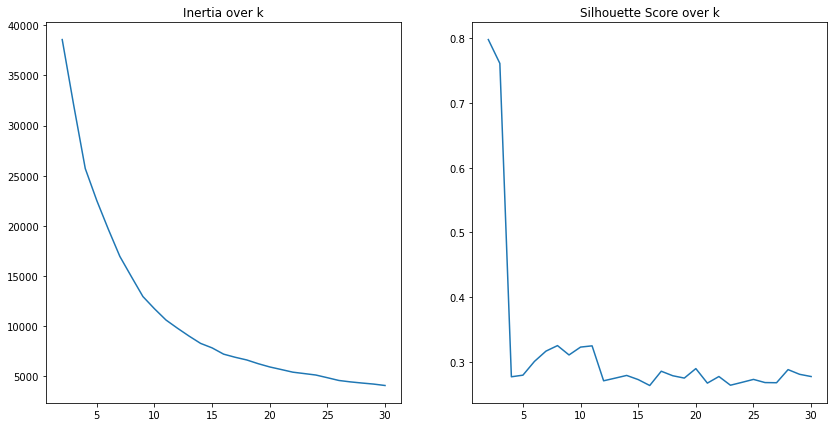

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

In [33]:
#too much noise so it's hard to utilize this model
kahuna['cluster'].value_counts()

0    2337
1      48
2      24
Name: cluster, dtype: int64

In [34]:
groupby entity or two random features
kmeans model 

SyntaxError: invalid syntax (Temp/ipykernel_15508/970664062.py, line 1)

In [38]:
lis = [1,2,3,4,4]
lis.reverse()
lis

[4, 4, 3, 2, 1]

In [64]:
rev_columns = list(columns.astype(str))
rev_columns.reverse()

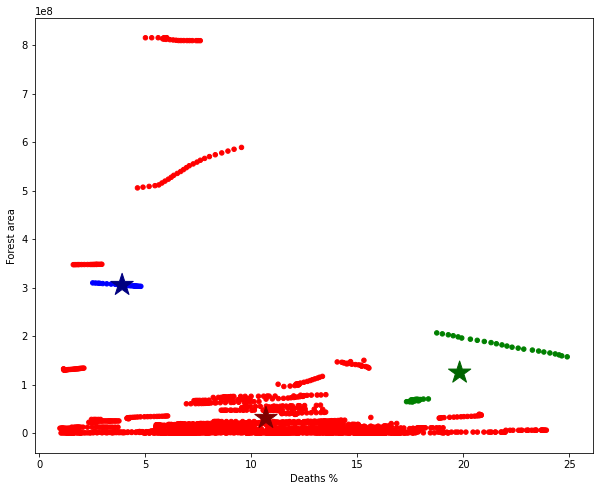

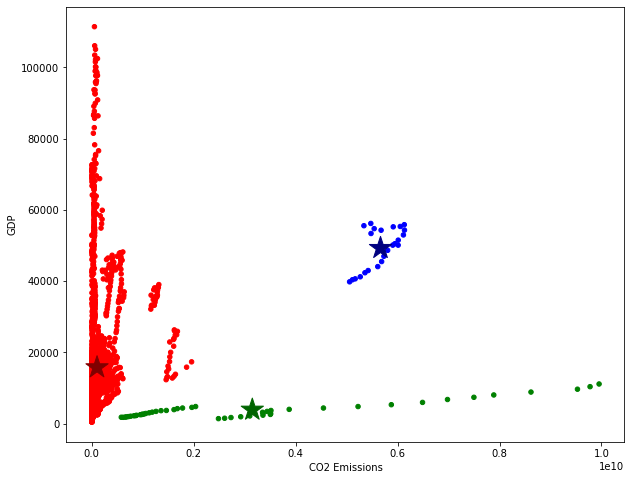

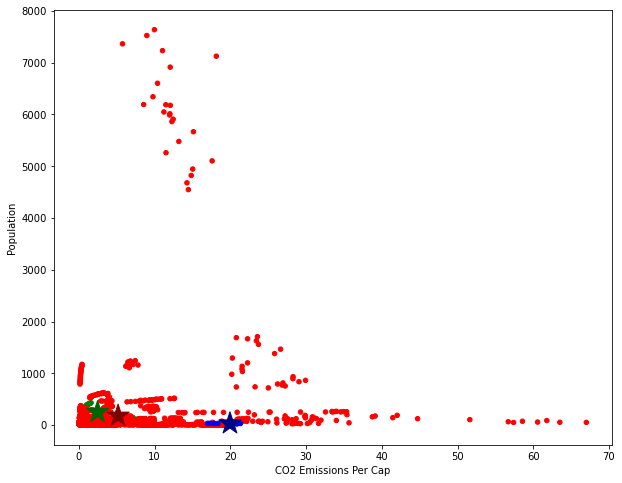

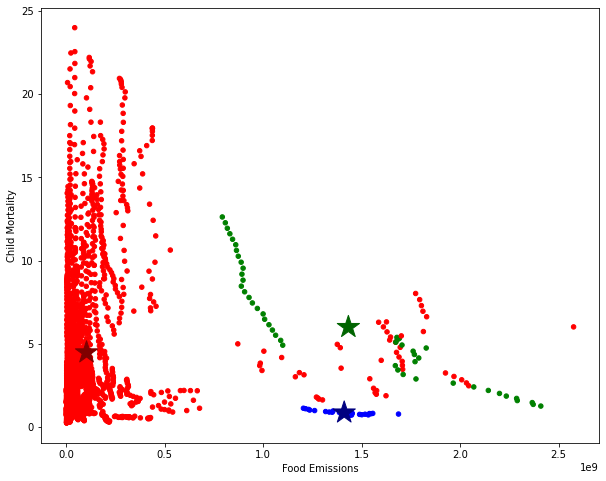

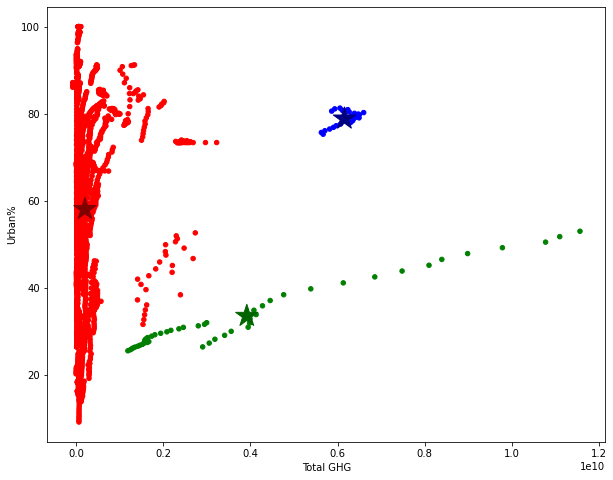

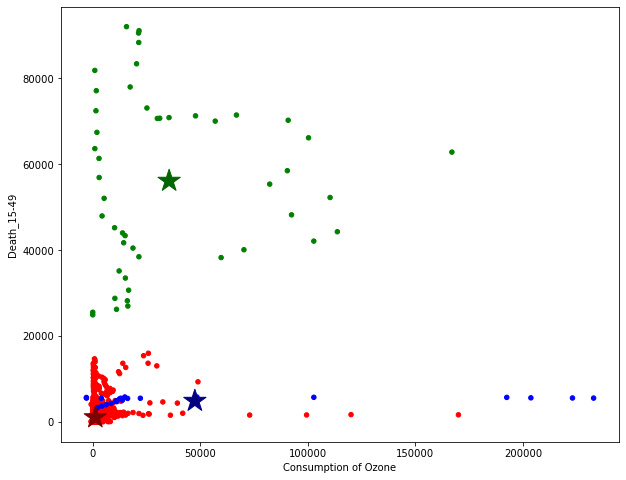

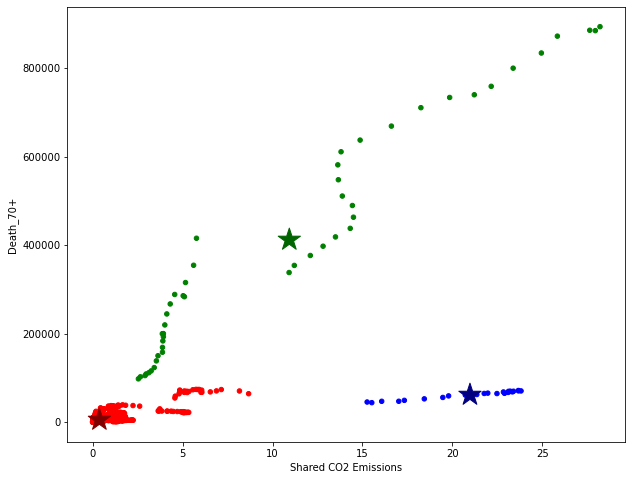

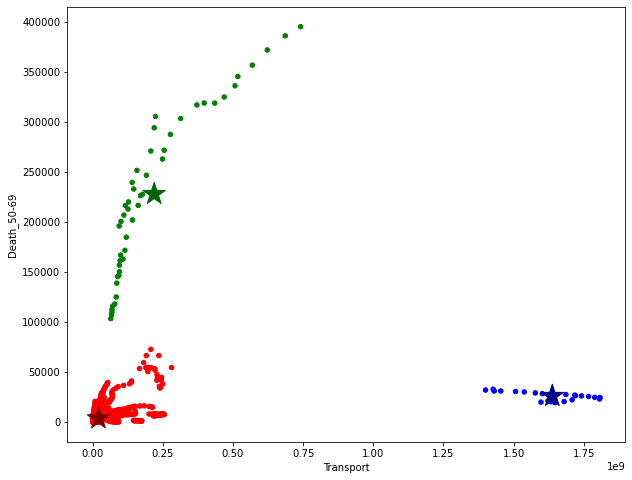

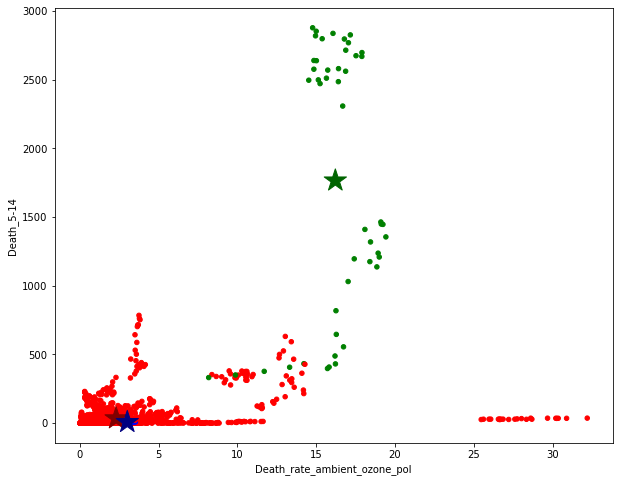

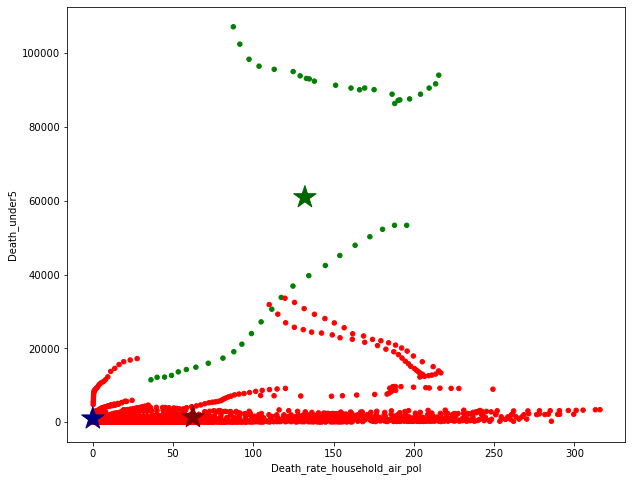

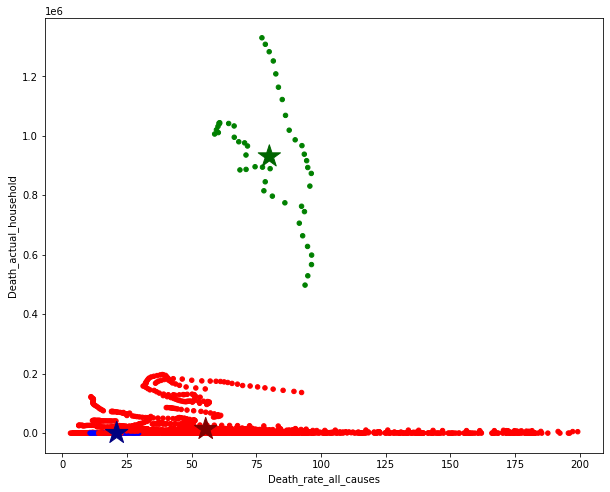

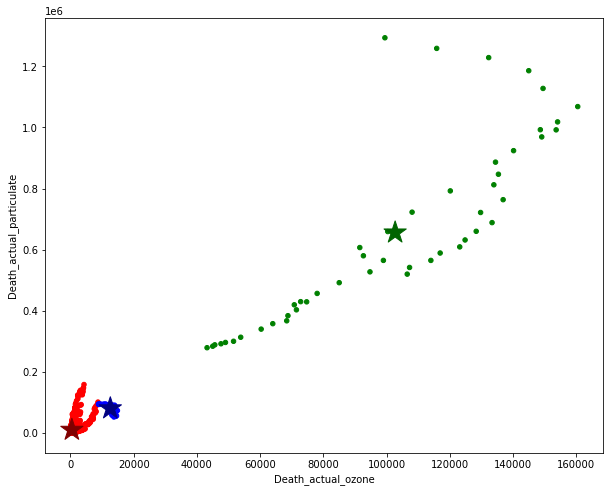

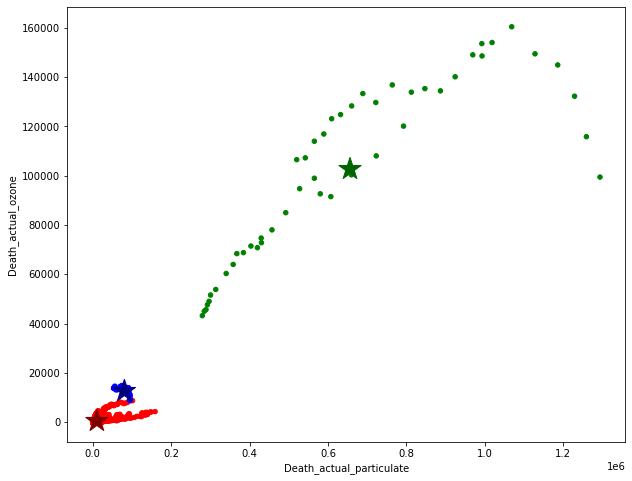

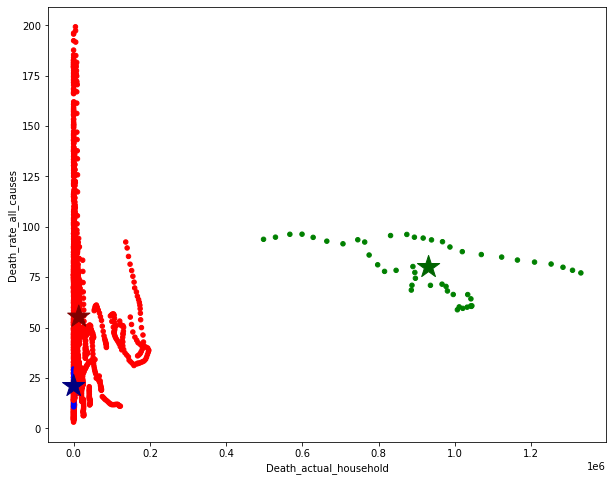

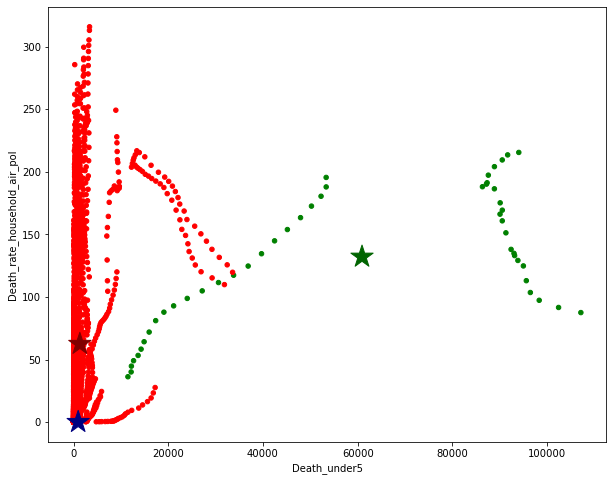

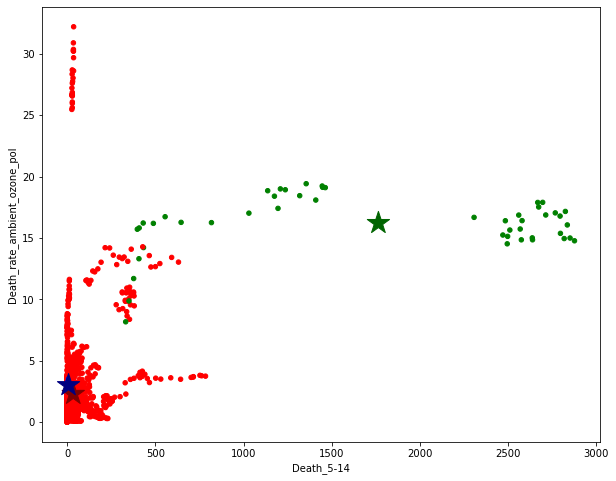

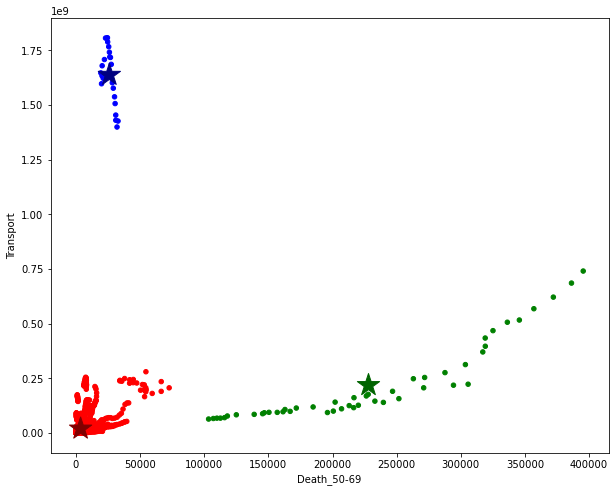

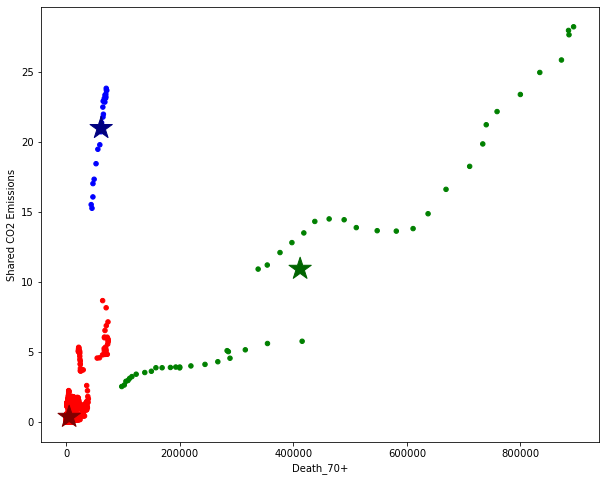

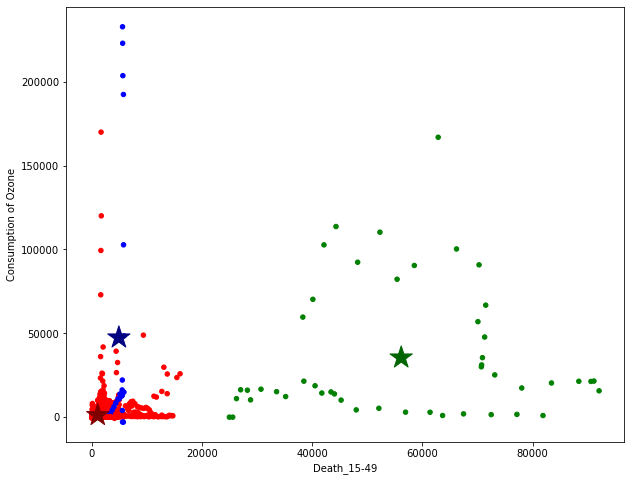

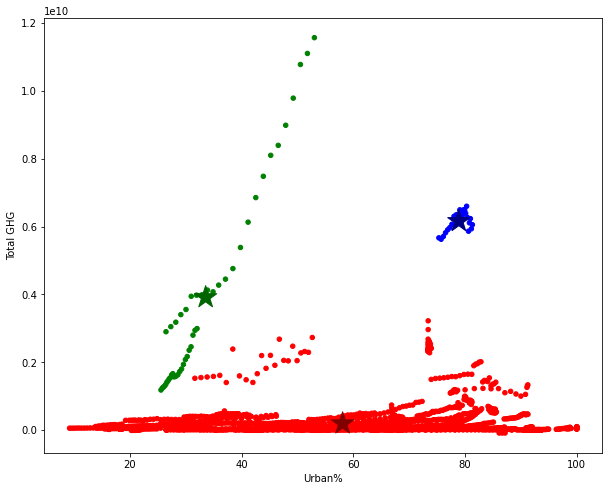

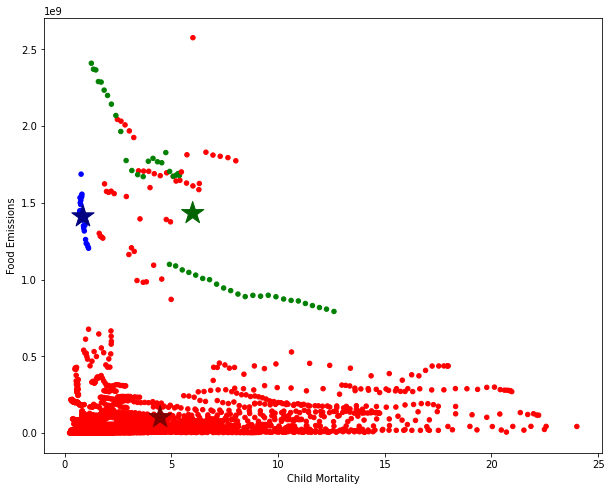

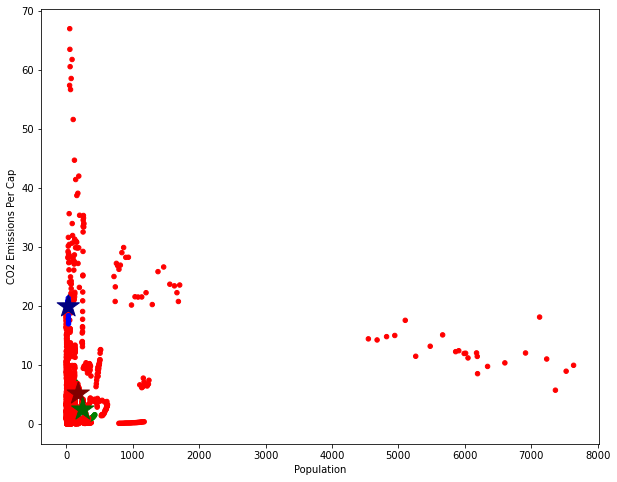

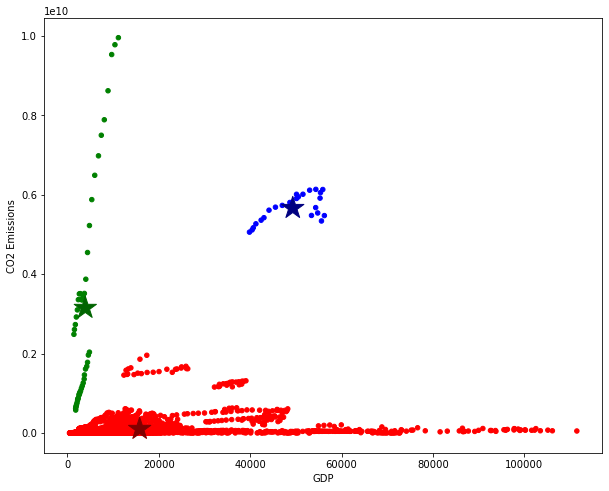

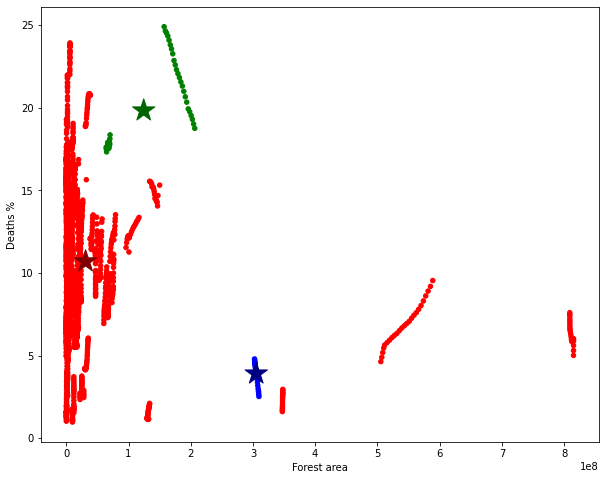

In [66]:
for x, y in zip(columns, rev_columns):
    colors = ["red", "green", "blue"]
    kahuna['color'] = kahuna['cluster'].map(lambda p: colors[p])

    ax = kahuna.plot(    
        kind="scatter", 
        x=x, y=y,
        figsize=(10,8),
        c = kahuna['color']
    )
    centroids.plot(
    kind="scatter", 
    x=x, y=y, 
    marker="*", c=["maroon", "darkgreen", "navy"], s=550,
    ax=ax
    );

In [67]:
from mpl_toolkits import mplot3d

In [ ]:
#gaussian models, spectral models, ward, aglomartive(egglomartive), optics

-------------------------

## KMeans

In [ ]:
groupby entity or two random features
kmeans model 